In [2]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [3]:
df=pd.read_csv('C:/Users/hp/OneDrive/Desktop/Netflix Dataset Project/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
nulldirector=df['director'].isnull().sum()
print(nulldirector)

2634


In [16]:
uniquedirector=df['director']!='nan'
print(uniquedirector)

0       True
1       True
2       True
3       True
4       True
        ... 
8802    True
8803    True
8804    True
8805    True
8806    True
Name: director, Length: 8807, dtype: bool


In [21]:
df['director'].fillna('unknown', inplace = True)
print(df['director'].isnull().count())

8807


In [19]:
fillnulldifrector.info()

AttributeError: 'Series' object has no attribute 'info'

In [30]:
print(df['cast'].nunique())

7692


In [48]:
# print(df.groupby('cast')['show_id'].count())
xdf = df['cast'].value_counts()
xdf

David Attenborough                                                                                                                                                                                              19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                                         14
Samuel West                                                                                                                                                                                                     10
Jeff Dunham                                                                                                                                                                                                      7
David Spade, London Hughes, Fortune Feimster                                                                                                                

In [66]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [52]:
#df['cast'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)


In [58]:
#df['date_added'] = pd.to_datetime(df['date_added'])
df.info()
#df['date_added']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [59]:
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [62]:
#df['rating']
df['rating'].fillna('NR',inplace=True)

In [65]:
df['duration'].fillna(0,inplace=True)

In [73]:
#df['yaer_Added']=df['date_added'].dt.year
#df.rename(columns={'yaer_Added':'year_added'},inplace=True)

In [74]:
df['month_Added']=df['date_added'].dt.month

In [84]:
df[['duration_value', 'duration_unit']] = df['duration'].str.split(' ', expand=True)
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')

In [85]:
df['desc_length'] = df['description'].apply(lambda x: len(x.split()))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_Added,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90.0,min
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1.0,Season
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,158.0,min
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,88.0,min


<AxesSubplot:>

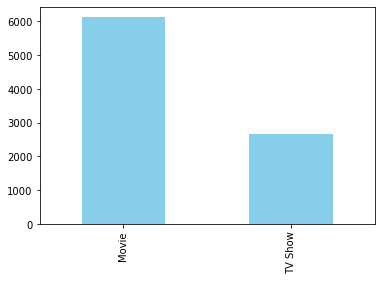

In [87]:
df['type'].value_counts().plot(kind='bar', color='skyblue')

<AxesSubplot:>

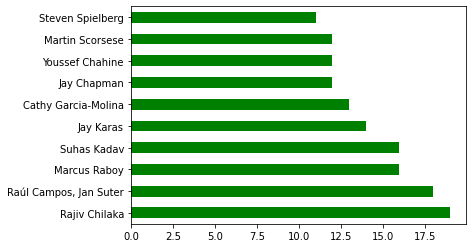

In [107]:
top_directors = df[df['director']!='unknown']['director'].value_counts().head(10).plot(kind='barh', color='green')

top_directors

<AxesSubplot:>

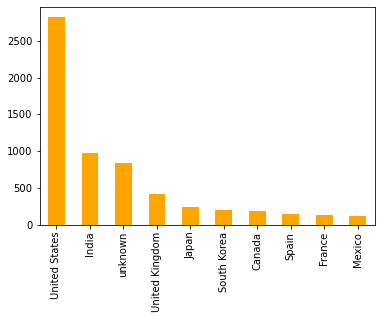

In [108]:
country_counts = df['country'].value_counts().head(10)
country_counts.plot(kind='bar', color='orange')

<AxesSubplot:>

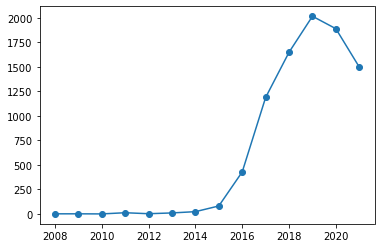

In [112]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')


<AxesSubplot:ylabel='Frequency'>

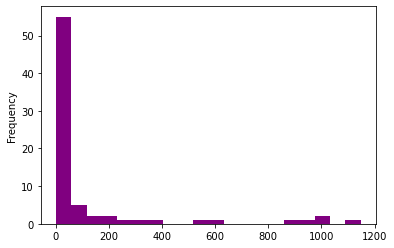

In [113]:
df['release_year'].value_counts().sort_index().plot(kind='hist', bins=20, color='purple')
